In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Association of random variables

## Housing price in Boston

In [29]:
housing = pd.read_csv('data/housing.csv', index_col = 0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


-`LSTAT` - "Low Status" population
-`INDUS` - Proportion of non-retail business acres per town
-`NOX` - Nitric oxides concentration
-`RM` - Average number of rooms per building
-`MEDV` - median value of homes (in thousands)

## Quantifying assocation with covariance

### Population

$$
\text{Cov}(X,Y) = \frac{\sum_{i=1}^{N} (X_i - \mu_X)(Y_i - \mu_Y)}{N}
$$

### Sample

$$
\text{Cov}(X,Y) = \frac{\sum_{i=1}^{n}(X_i - \overline{X})(Y_i - \overline{Y})}{n-1}
$$


In [30]:
housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


The covariance is also affected by variance of two random variables. 

Strongest association? -> Coefficient of correlation

### Population

$$
\rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

### Sample

$$
r(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_{S_{y}} \sigma_{S_{y}}}
$$

Now, the correlation will only tkae values in between negative one and one.

## Correlation

In [31]:
# correlation
housing.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


## Visualize the association between two variables

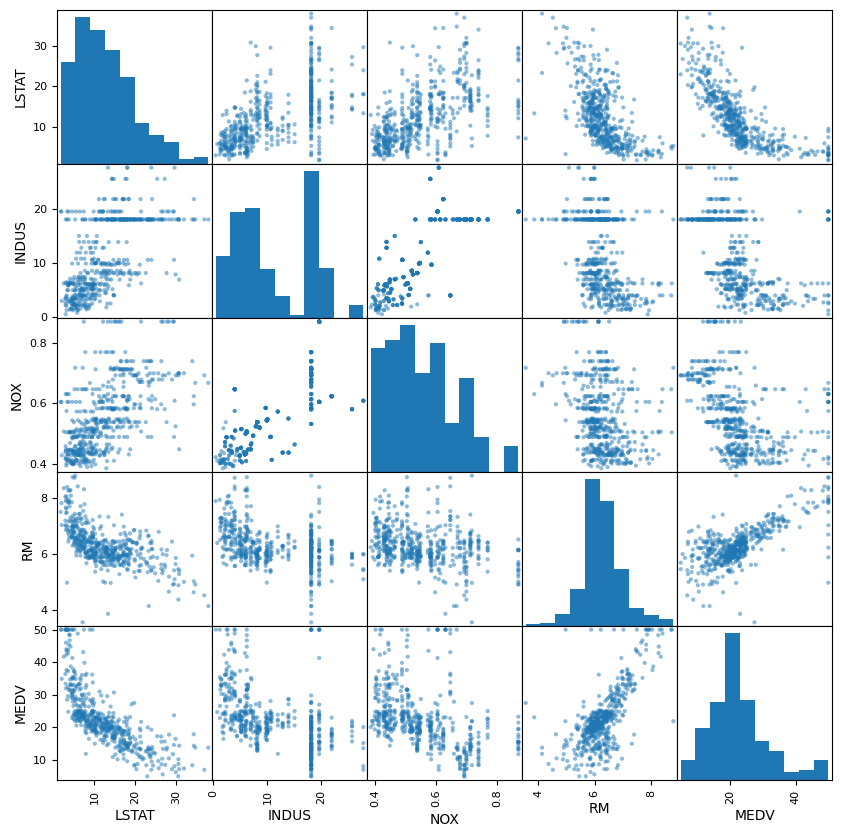

In [32]:
from pandas.plotting import scatter_matrix

sm = scatter_matrix(housing, figsize=(10, 10))

`RM` seems ot have a very strong linear pattern with `MEDV`.

# Simple linear regression model

**Response**: Price change in next 5 seconds

**Predictors**: Price, volume history of last 10 minutes

$$\text{Model: } y = f(x_1,x_2,x_3,...)$$

$$\text{Linear Regression Model: } y = b_0 + b_1x_1 + b_2x_2 + b_3x_3+...$$

$$\text{Simple Linear Regression Model: } y = b_0 + b_1x_1$$

### Population Model

$$
y_{i} = \beta_{0} + \beta_{1} * x_{i} + \varepsilon_{i}
$$

$$
\varepsilon_{i} \sim N(0, \sigma^{2})
$$

### Mean Equation

$$
\mu_{y|x_i} = \beta_{0} + \beta_{1} * x_{i}
$$

**Use samples to estimate** $\beta_{0}, beta_{1}, \sigma$

**Assumptions of Linear Regression Model**:

1. Linearity
2. Independence
3. Normality
4. Equal variance

In [33]:
b0 = 1
b1 = 2
housing['GuessResponse'] = b0 + b1*housing['RM']
housing['observederror'] = housing['MEDV'] - housing ['GuessResponse']
indices = [7, 20, 100]
print(housing['observederror'].loc[indices])

7      13.756
20      1.460
100    13.046
Name: observederror, dtype: float64


In [34]:
print('Sum of squared error is ', (housing['observederror']**2).sum())

Sum of squared error is  75291.322588


$$b_1 = \frac{\sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{N}(x_i - \bar{x})^2}$$

$$b_0 = \bar{y} - b_1\bar{x}$$

## Estimate model parameters with statsmodels

In [35]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'MEDV ~ RM', data=housing).fit()

b0 = model.params[0]
b1 = model.params[1]
housing['BestResponse'] = b0 + b1*housing['RM']

/var/folders/zt/rvj_w0gn555gpyk8ts1j2h840000gn/T/ipykernel_78401/1013206988.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0 = model.params[0]
/var/folders/zt/rvj_w0gn555gpyk8ts1j2h840000gn/T/ipykernel_78401/1013206988.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1 = model.params[1]


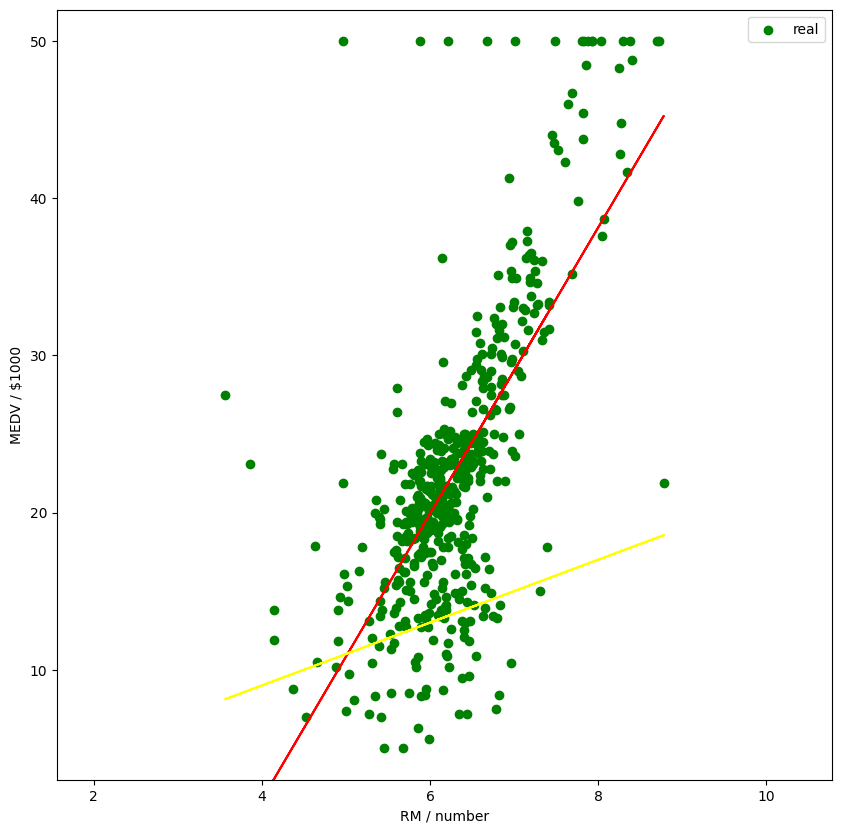

In [36]:
plt.figure(figsize=(10, 10))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='real')
#plt.scatter(housing['RM'], housing['y'], color='b', label='model')
plt.plot(housing['RM'], housing['BestResponse'], color='red')
plt.plot(housing['RM'], housing['GuessResponse'], color='yellow')
plt.ylabel('MEDV / $1000')
plt.xlabel('RM / number')
plt.xlim(np.min(housing['RM']) - 2, np.max(housing['RM']) + 2)
plt.ylim(np.min(housing['MEDV']) - 2, np.max(housing['MEDV']) + 2)
plt.legend()
plt.show()

The red color line is a best fit line. Some square error is smaller with best fit line. 

## What can we say with our model?

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           2.49e-74
Time:                        14:39:32   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Significance of `RM`

$$
H_0:\beta_1 = 0
$$

$$
H_1:\beta_1 \neq 0
$$

$$
\hat{t}=\frac{b_1-\beta_1}{S_{b_{1}}}
$$

$$
\text{p-value} = 0.000 < 0.05 \text{ , reject } H_0
$$

### Estimate of $\beta_1$

**95% confidence interval**: $8.279 \leq b_1 \leq 9.925$

### Performance of the model - $R^2$

**Total variation**
$$
SST = \sum_{i=1}^{N}(y_i - \bar{y})^2
$$

**Variation explained**
$$
SSR = \sum_{i=1}^{N}(\hat{y} - \bar{y})^2
$$

If SSR is larger than SST, the differnece between our prediction and the mean of y is larger. It means that our prediction is significantly different from the mean of the response.

**Variation unexplained**
$$
SSE = \sum_{i=1}^{N}(\hat{y} - \bar{y})^2
$$



$$
\text{Total variation} = \text{Variation explained} + \text{Variation unexplained}
$$

$$
R^2 = 1 - \frac{\text{Variation unexplained}}{\text{Total variation}}
$$

If $R^2=0.484$, about 48.4% of variations of MEDV can be explained by our model. 

# Diagnostic of linear regression model

Assumptions of Linear Regression Model:
1. Linearity
2. Independence
3. Normality
4. Equal variance

We only need to demonstrate that our sample data is not against these assumptions.

**Validation of Linearity**: we just look at the graph and see if it follows a linear form.

**Validation of Independence**: we just need to demonstrate the observed error is independent mutually; there is no serial correlation in errors. 

First, we can plot residual plot, which is the plot observed error.

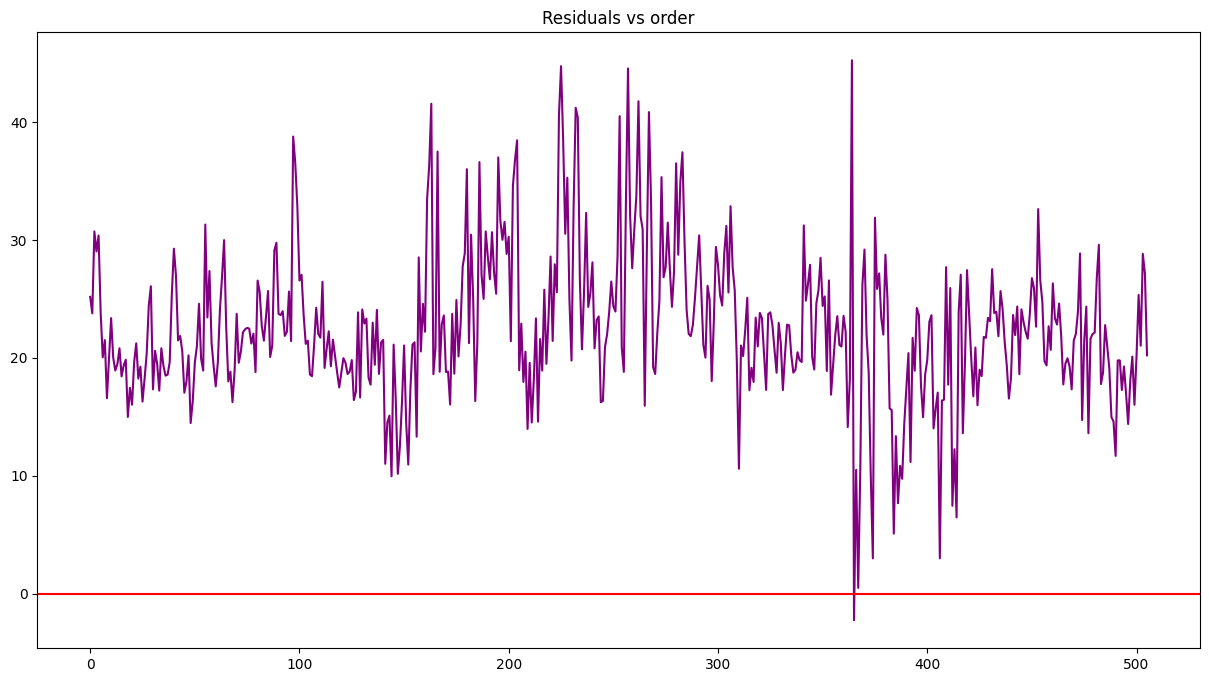

In [38]:
housing['error'] = housing['MEDV'] = housing['BestResponse']
plt.figure(figsize=(15, 8))
plt.title('Residuals vs order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

There's no obvious pattern in this plot.

For quantitative validation of indepdendence, we need a Durbin Watson test for serial correlation.

$$
d = \frac{\sum_{t=2}^{T} (e_t - e_{t-1})^2}{\sum_{t=1}^{T} e_t^2}
$$

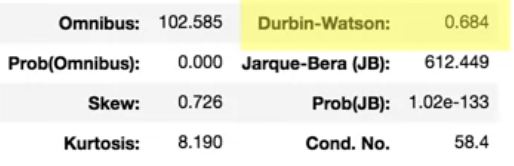

Values between 1.5 and 2.5 are rated normal. If below 1.5, it may be positively correlated. If above 2.5, it may be negatively correlated. Hence, from the image, the assumption of independence is violated.

**Validation of Normality**: we can use quantile to quantile plot, or Q-Q plot. We can use `stats.probplot` from Python package `scipy.stats` to draw the Q-Q plot.

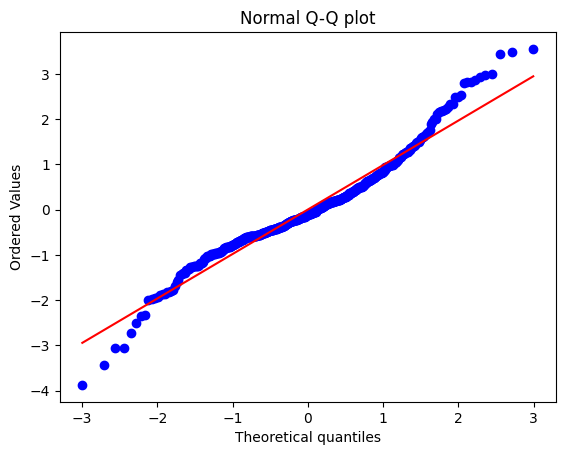

In [39]:
z = (housing['error'] - housing['error'].mean()) / housing['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

If errors follow normal distribution, they will fall on the 45 degree line roughly. In our model, it deviates a bit in the right tail, but overall it satisfies the normality assumption.

**Validation of Equal Variance**: we can plot observed error versus predictor. If variance of noise is equal for different variance predictor, it should not have pattern.

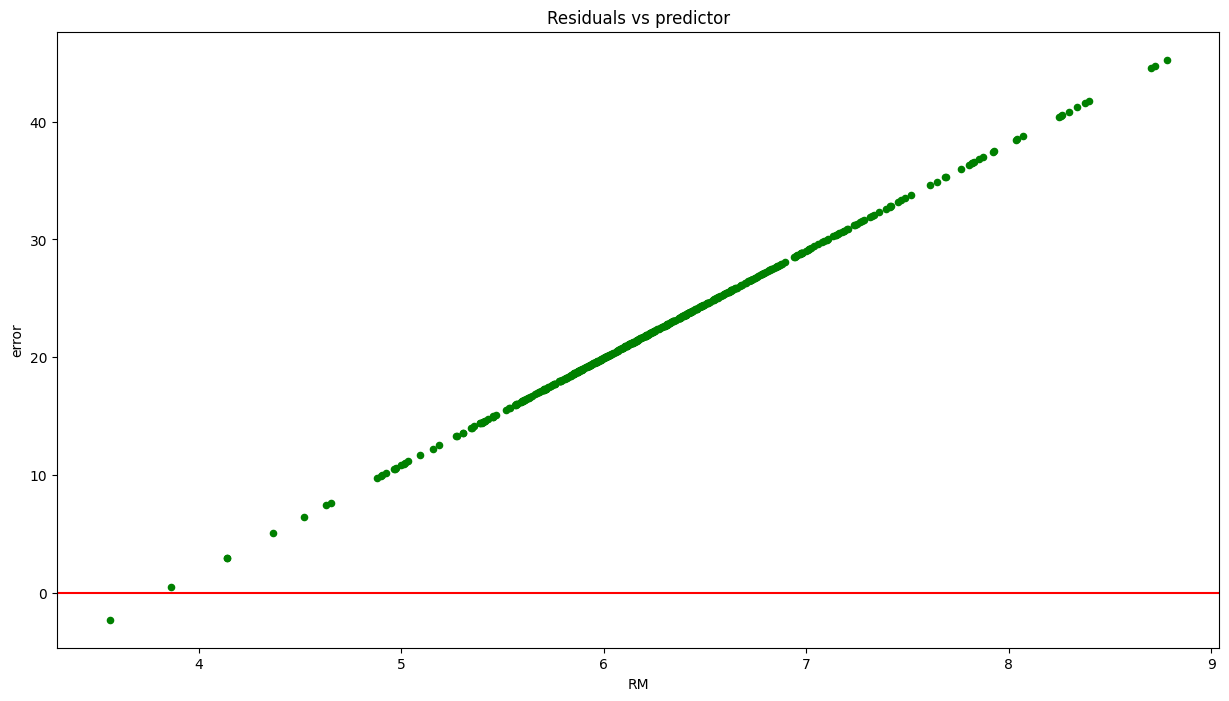

In [40]:
housing.plot(kind='scatter', x='RM', y='error', figsize=(15, 8), color='green')
plt.title('Residuals vs predictor')
plt.axhline(y=0, color='red')
plt.show()

Variance is larger for larger RM. Hence, assumption of equal variance is also violated.

**Cannot make statistical inference if assumptions are violated, but the accuracy and consistency of model does not rely on these four assumptions**

# Multiple linear regression model

## SPY

**SPY** is an exchange-traded fund which tracks S&P500

Why choose SPY as a target to view the regression model:
1. Cheap: The value of SPY is worth approximately 1/10 of S&P500's index level
2. Low fees: 0.04%
3. Volatility: Frequently log double digits loss and gains

We will predict data price change of SPY when US market opens in the morning. We know that different indices in different markets are highly correlated. Using indices for other markets is good for prediction model of SPY. 

You can use DataFrame from_csv to read assessing files of all indices and SPY. 

In [41]:
aord = pd.read_csv("data/indice/ALLOrdinary.csv") # All ordinary

nikkei = pd.read_csv("data/indice/Nikkei225.csv").ffill() # Nikkei
hsi = pd.read_csv("data/indice/HSI.csv") # HSI

daxi = pd.read_csv("data/indice/DAXI.csv") # DAX performance index
cac40 = pd.read_csv("data/indice/CAC40.csv") # cac40 index

sp500 = pd.read_csv("data/indice/SP500.csv") # S&P 500
dji = pd.read_csv("data/indice/DJI.csv") # dji : dow jones industry average index
nasdaq = pd.read_csv("data/indice/nasdaq_composite.csv") # Nasdaq
spy = pd.read_csv("data/indice/SPY.csv")

In [42]:
spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,146.529999,146.990005,143.880005,144.929993,116.593864,204935600
1,2008-01-03,144.910004,145.490005,144.070007,144.860001,116.537567,125133300
2,2008-01-04,143.339996,143.440002,140.910004,141.309998,113.681671,232330900
3,2008-01-07,141.809998,142.229996,140.100006,141.190002,113.585121,234991000
4,2008-01-08,142.080002,142.899994,138.440002,138.910004,111.750923,326365700


Multiple linear regression model will have multiple predictors. Our **response variable** is the open price of SPY tomorrow minus today's open, $\text{Open Next Day} - \text{Open}$

We expect to make a prediction in the morning in the US market.

Just a reminder, we cannot use any information available after the opening of a US market on current day to calculate predict values. These variables cannot be predictors.

$$y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 + ...$$

Based on predict price change, we decide whether to long or short. In total, we have eight predictors. We will have three groups of predictors:
 
1. One-day lag variables from the US market. $\text{Open} - \text{Open Last Day}$ for SPY, SP500, NASDAQ, DJI

2. One-day lag variables from the European markets. $\text{Open} - \text{Open Last Day}$ for CAC40, DAXI

3. Close price minus open price in Asian and Australian markets. $\text{Close} - \text{Open}$

## Data Munging

Next, we'll mung the data to get all these predictors and the response. 

1. Generate an empty data frame and let the index to be the same as the index of SPY

2. Add the contents of response and predictors

In [43]:
indicepanel = pd.DataFrame(index=spy.index)
indicepanel['spy'] = spy['Open'].shift(-1) - spy['Open']
indicepanel['spy_lag1'] = indicepanel['spy'].shift(1)
indicepanel['sp500'] = sp500['Open'] - sp500['Open'].shift(1)
indicepanel['nasdaq'] = nasdaq['Open'] - nasdaq['Open'].shift(1)
indicepanel['dji'] = dji['Open'] - dji['Open'].shift(1)

indicepanel['cac40'] = cac40['Open'] - cac40['Open'].shift(1)
indicepanel['daxi'] = daxi['Open'] - daxi['Open'].shift(1)

indicepanel['aord'] = aord['Close'] - aord['Open']
indicepanel['hsi'] = hsi['Close'] - hsi['Open']
indicepanel['nikkei'] = nikkei['Close'] - nikkei['Open']

indicepanel['Price'] = spy['Open']

In [44]:
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
0,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,15.500000,-71.679688,-464.320313,146.529999
1,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-50.100097,-162.750000,-48.830078,144.910004
2,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,-2.300293,515.349609,99.370117,143.339996
3,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-117.399903,216.951171,234.450195,141.809998
4,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-27.500000,-354.060547,-158.209961,142.080002


From the printed table, we can see missing values. This is because:

1. When we calculate price change, we may generate NaN values in the first row, one-day lag, and the last row, one-day in the future.

2. In different markets, they may have different holidays in which the markets are closed. 

We need to handle NaN values first before we view the model.

First, we'll use forward fill to fill the holes in the data frame by propagating last valid observation forward to the next valid. Second, we'll drop the first row by using `dropna()`

In [45]:
indicepanel=indicepanel.fillna(method='ffill')
indicepanel=indicepanel.dropna()

/var/folders/zt/rvj_w0gn555gpyk8ts1j2h840000gn/T/ipykernel_78401/2078614712.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  indicepanel=indicepanel.fillna(method='ffill')


We can check if there is any NaN remaining by computing numbers NaN values.

In [46]:
indicepanel.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

From the printout, it is clear that we filled all holes.

Finally, we can save our clean data into a  data file.

In [47]:
indicepanel.to_csv("data/indicepanel.csv")

In [48]:
indicepanel.shape

(2678, 11)

We have 2,678 days of data, 1 response vaariable, 9 predictors, and the last column keeps a record of open price of SPY.

## Data Splitting

To make sure that our model is consistent in future data, we need to split the data into two parts: one is for building the model, the other part is for testing the model to see if the model can still make reasonable prediction in this dataset.

In [49]:
Train = indicepanel.iloc[-2000:-1000,:]
Test = indicepanel.iloc[-1000:,:]
print(Train.shape, Test.shape)

(1000, 11) (1000, 11)


Stock data is very noisy. We will use the equal size os samples for both train and test. We assign the most recent: 1,000 days at the test data and 1,000 days before the test at the training data.

## Exploration on Train data

First, we use a **scatter matrix** to get a pairwise scatterplot. 

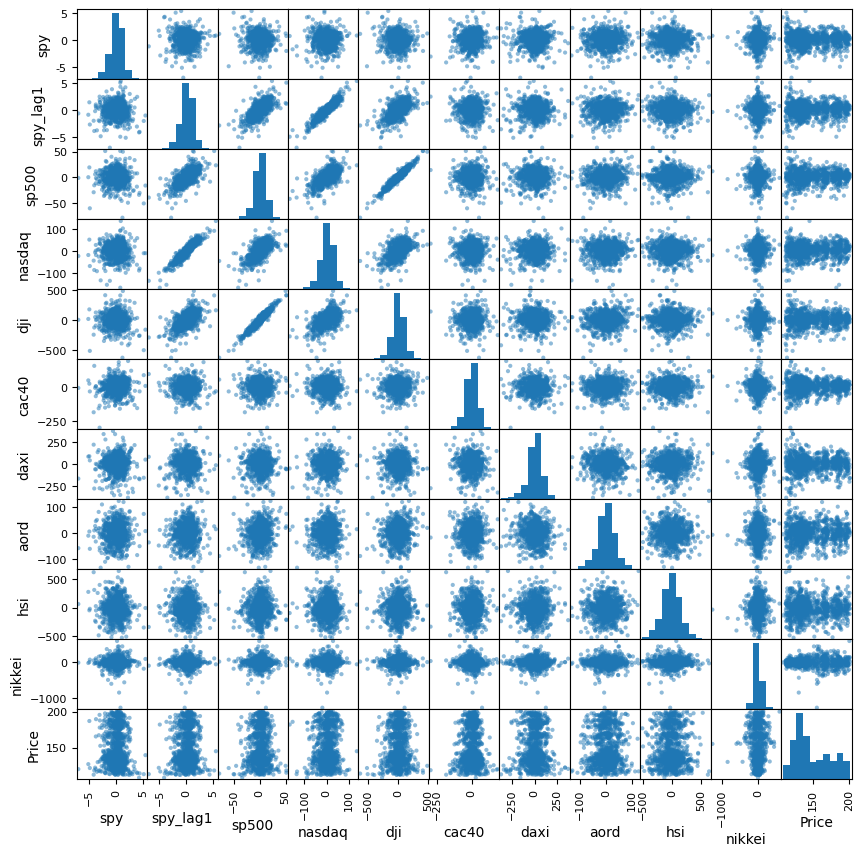

In [50]:
from pandas.plotting import scatter_matrix
sm=scatter_matrix(Train,figsize=(10,10))

If you check the scatterplots that response SPY with other nine predictors (first row), you may find that there is no pattern, which is evidence of high noisy properties of stock markets.

We need to compute correlation in order to see the association clearly

In [51]:
Train.iloc[:,:-1].corr()['spy']

spy         1.000000
spy_lag1   -0.011623
sp500      -0.018632
nasdaq      0.012333
dji        -0.037097
cac40       0.076886
daxi        0.019410
aord        0.048200
hsi        -0.038361
nikkei      0.035379
Name: spy, dtype: float64

From the output of correlation, we find that the predictors for European and Asian markets do have an association with SPY (`cac40` to `nikkei` inclusive), which have higher impacts than predictors of US markets (my data might be wrong, in the video, the European and Asian markets have higher correlation)

## Regression model

We can use OLS method of Statsmodels to build a multiple linear regression model. 

In [52]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+daxi+aord+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.133
Date:                Mon, 29 Jul 2024   Prob (F-statistic):             0.0245
Time:                        14:39:34   Log-Likelihood:                -1643.1
No. Observations:                1000   AIC:                             3306.
Df Residuals:                     990   BIC:                             3355.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0798      0.040      1.993      0.047       0.001       0.158
spy_lag1      -0.1233      0.092     -1.340      0.180      -0.304       0.057
sp500          0.0178      0.014      1.273      0.203      -0.010       0.045
nasdaq         0.0047      0.004      1.240      0.215      -0.003       0.012
dji           -0.0023      0.001     -1.588      0.113      -0.005       0.001
cac40          0.0021      0.001      2.485      0.013       0.000       0.004
daxi           0.0003      0.000      0.724      0.469      -0.001       0.001
aord           0.0017      0.001      1.497      0.135      -0.001       0.004
nikkei         0.0004      0.000      1.293      0.196      -0.000       0.001
hsi           -0.0003      0.000     -1.412      0.158      -0.001       0.000
==============================================================================
Omnibus:                       85.811   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.379
Skew:                          -0.444   Prob(JB):                     7.73e-52
Kurtosis:                       5.205   Cond. No.                         385.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Significance of the model - F test

F test is for the overall significance of the multiple linear regression model.

$$H_0: \beta_1 = \beta_2 = \beta_3 = \beta_4 = ... = 0$$

$$H_a: \text{at least one of them is not zero}$$

If we reject it and accept the alternative, it means that at least one of the predictors is useful; our model is better fitted than intercept-only model

Our p-value is 0.0106, which is less than 0.05, and it indicates that our model includes useful predictors

### Significance of the individual predictors - t test

In our table, the `P>|t|` column lists the p-value for the test of significance for the individual predictors

Most of the predictors are not significant, except Aord (in the video, Aord has a p-value of 0.001). That means all other predictors are useless information of SPY. It may be because of multicollinearity.

### Multicollinearity

This refers to the events where two or more predictors in the multiple regression model are highly, linearly related; one predictor can be predicted from the others with a substantial degree of accuracy and it's typical for our model, since all indices of different markets are correlated. Multicollinearity does not reduce predicting power. 

In [53]:
Train.iloc[:, :-1].corr()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei
spy,1.000000,-0.011623,-0.018632,0.012333,-0.037097,0.076886,0.019410,0.048200,-0.038361,0.035379
spy_lag1,-0.011623,1.000000,0.664272,0.932118,0.575321,-0.035791,0.030278,0.039616,-0.015703,0.013315
sp500,-0.018632,0.664272,1.000000,0.636528,0.960032,0.004462,0.000139,0.127922,0.028705,0.004431
nasdaq,0.012333,0.932118,0.636528,1.000000,0.517313,-0.023789,0.040097,0.049933,-0.003305,0.006210
dji,-0.037097,0.575321,0.960032,0.517313,1.000000,0.008134,-0.010432,0.119396,0.026176,0.003770
cac40,0.076886,-0.035791,0.004462,-0.023789,0.008134,1.000000,-0.015331,0.027647,0.026072,-0.054148
daxi,0.019410,0.030278,0.000139,0.040097,-0.010432,-0.015331,1.000000,-0.080747,0.038492,0.004546
aord,0.048200,0.039616,0.127922,0.049933,0.119396,0.027647,-0.080747,1.000000,0.010722,0.024909
hsi,-0.038361,-0.015703,0.028705,-0.003305,0.026176,0.026072,0.038492,0.010722,1.000000,0.035837
nikkei,0.035379,0.013315,0.004431,0.006210,0.003770,-0.054148,0.004546,0.024909,0.035837,1.000000


In this situation, the coefficient estimates of the multiple equation may change erratically in response to small changes of data.

## Making Predictions

Now we can predict daily change of SPY.

/var/folders/zt/rvj_w0gn555gpyk8ts1j2h840000gn/T/ipykernel_78401/1214922085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['PredictedY'] = lm.predict(Train)
/var/folders/zt/rvj_w0gn555gpyk8ts1j2h840000gn/T/ipykernel_78401/1214922085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['PredictedY'] = lm.predict(Test)


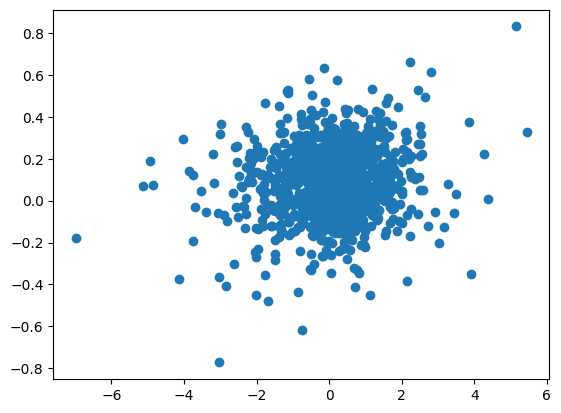

In [54]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

# Scatterplot between real and predicted daily change of SPY
plt.scatter(Train['spy'], Train['PredictedY'])

It has a positive correlation, though not very strong. Considering the daily change, the result isn't bad.

## Model Evaluation

$RMSE$: the square root of sum of squared errors averaged by degrees of freedom, where $k$ is the number of predictors.

The reason to use the degrees of freedom is that square of RMSE is unbiased estimator of variance of the noise.

$$RMSE = \sqrt{\frac{SSE}{n-k-1}}$$

$R^2$: in simple linear regression, we use R-squared to get the percentage of variation that can be explained by a model. We found that by adding more predictors, the askew is always increasing, but the accuracy is even worse. To compensate the effects of numbers predictors, we have adjusted R-squared, which measures percentage of variation of a response that is explained by the model. 

$$R^2_\text{adjusted} = 1 - \frac{(1-R^2)(n-1)}{n-k-1}$$


In [55]:
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR / SST
    adjustR2 = 1 - (1 - r2) * (data.shape[0] - 1) / (data.shape[0] - model_k - 1)
    RMSE = (SSE / (data.shape[0] - model_k - 1))**0.5
    return adjustR2, RMSE


* `model` - model name
* `modek_k` - number of predictors
* 'yname` - a column name of our response variable

In [57]:
print("Adjusted R2 and RMSE on Train: ", adjustedMetric(Train,lm, 9, 'spy'))
print("Adjusted R2 and RMSE on Test: ", adjustedMetric(Test, lm, 9, 'spy'))

Adjusted R2 and RMSE on Train:  (0.010102287014777778, 1.2575336814939864)
Adjusted R2 and RMSE on Test:  (0.013609326309927838, 1.7596933726668724)


/var/folders/zt/rvj_w0gn555gpyk8ts1j2h840000gn/T/ipykernel_78401/1511747315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yhat'] = model.predict(data)
/var/folders/zt/rvj_w0gn555gpyk8ts1j2h840000gn/T/ipykernel_78401/1511747315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yhat'] = model.predict(data)


In [59]:
def assessTable(test, train, model, model_k, y_name):
    r2_test, RMSE_test = adjustedMetric(test, model, model_k, y_name)
    r2_train, RMSE_train = adjustedMetric(train, model, model_k, y_name)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2_train, RMSE_train]
    assessment['Test'] = [r2_test, RMSE_test]
    return assessment

## Overfitting?

If RMSE and adjusted R^2 in train and test differ dramatically.

In [60]:
assessTable(Test, Train, lm, 9, 'spy')

/var/folders/zt/rvj_w0gn555gpyk8ts1j2h840000gn/T/ipykernel_78401/1511747315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yhat'] = model.predict(data)
/var/folders/zt/rvj_w0gn555gpyk8ts1j2h840000gn/T/ipykernel_78401/1511747315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yhat'] = model.predict(data)


,Train,Test
R2,0.010102,0.013609
RMSE,1.257534,1.759693


From output our model, RMSE increases in test, which is a bit worse than that in the train. WE just want ot see where the test is better. Overall, our model is not overfitted. Our R^2 is only 1.5 percent, which is quite low, but in the stock market it's not that bad. 